# ESD for Pytorch pretrained models
http://pytorch.org/docs/master/torchvision/models.html

Try to auto-fit MP using Kernel Density Estimator (KDE) and Optimizer (i.e LM Fit)


In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

import numpy as np
import scipy as sp
from scipy.linalg import svd

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import import_ipynb
import RMT_Util

importing notebook from RMT_Util.ipynb


/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

In [4]:
alexnet = models.alexnet(pretrained=True)

### Marchenko Pastur Fit

## FC1

In [5]:
this_im = 17

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W17 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W17)
        
        u, sv, sh = svd(W17)
        
        evals17 = sv*sv
        break

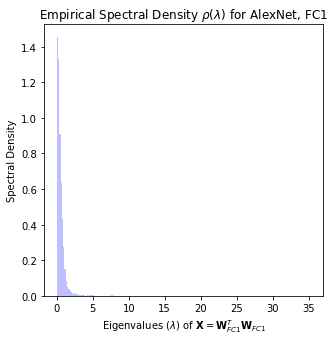

In [6]:
plt.hist(evals17, bins=200,  alpha=0.25, color='blue', density=True);
plt.title(r"Empirical Spectral Density $\rho(\lambda)$ for AlexNet, FC1")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.savefig("img/alexnet-fc1-full.png")

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 11.13
% sigma 0.6057


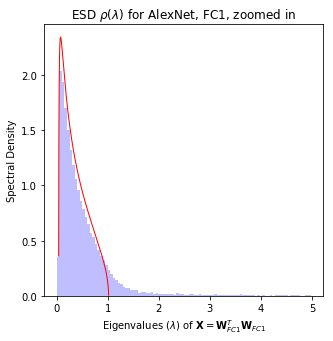

In [7]:
sigma = RMT_Util.plot_ESD_and_fit(model=None,eigenvalues=evals17[evals17<5], weightfile=None, layer=None, 
                            Q=Q, num_spikes = 400, sigma=None, color='blue')
plt.title(r"ESD $\rho(\lambda)$ for AlexNet, FC1, zoomed in")
plt.ylabel(r"Spectral Density")
plt.xlabel(r"Eigenvalues ($\lambda$) of $\mathbf{X}=\mathbf{W}_{FC1}^{T}\mathbf{W}_{FC1}$")
plt.savefig("img/alexnet-fc1.png")

### AutoMated Fits

FC1 = Layer 17

Recall we zoomed in A LOT to fit this, but only dropped 3% of the eigenvalues

Text(0.5,1,'FC1 layer 17')

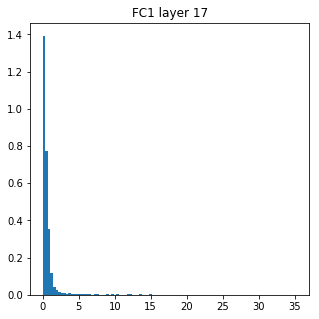

In [8]:
plt.hist(evals17, bins=100, density=True);
plt.title("FC1 layer 17")

(3993, 4096, 97.4853515625)

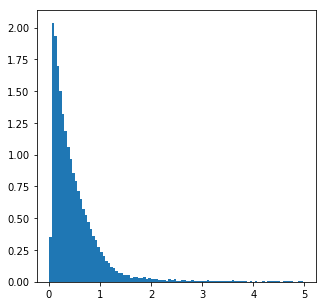

In [9]:
plt.hist(evals17[evals17<5], bins=100,density=True);
len(evals17[evals17<5]), len(evals17), 100.0*len(evals17[evals17<5])/len(evals17)

### KDE

In [10]:
from scipy import optimize
from sklearn.neighbors import KernelDensity

% spikes outside bulk 7.90
% sigma 0.7069


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


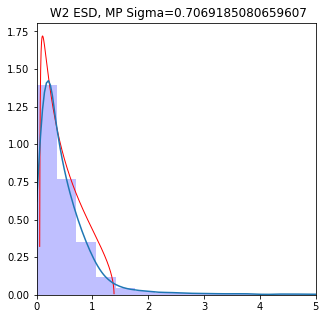

In [11]:
evals = evals17
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=300)
plt.xlim(0,5)

kde = KernelDensity(kernel='linear', bandwidth=0.25).fit(evals.reshape(-1, 1))
X_plot = np.linspace(0, np.max(evals), 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

% spikes outside bulk 21.26
% sigma 0.5358


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


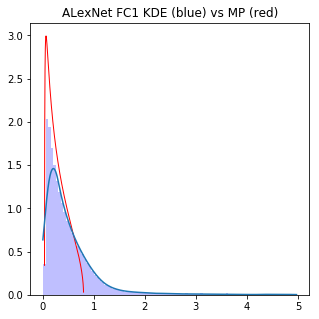

In [12]:
evals = evals17[evals17<5]
sigma = RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=700)
plt.title("ALexNet FC1 KDE (blue) vs MP (red)")

kde = KernelDensity(kernel='linear', bandwidth=0.25).fit(evals.reshape(-1, 1))
X_plot = np.linspace(0, np.max(evals), 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens))

% spikes outside bulk 2.57
% sigma 0.6852


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


Text(0.5,1,'MP fit to FC1, sigma auto-fit')

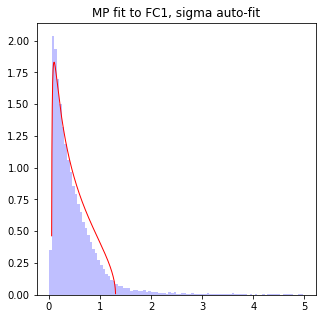

In [15]:
s1 = RMT_Util.fit_mp(evals17, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=100, sigma=s1)
plt.title("MP fit to FC1, sigma auto-fit")

In [17]:
RMT_Util.calc_mp_soft_rank(evals=evals17,Q=Q, sigma=s1)

0.03698511617935258

### FC2

In [18]:
this_im = 20

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W20 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W20)
        
        u, sv, sh = svd(W20)
        
        evals20 = sv*sv
        break

RMT_Util.ipynb:6: RuntimeWarning: divide by zero encountered in true_divide
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in sqrt
  "source": [
RMT_Util.ipynb:6: RuntimeWarning: invalid value encountered in multiply
  "source": [


% spikes outside bulk 2.57
% sigma 0.7045


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


(0, 5)

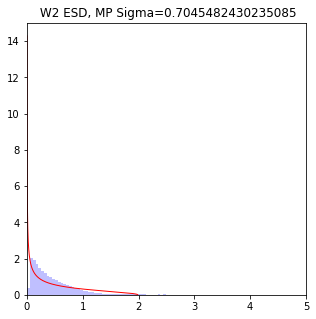

In [22]:
s1 = RMT_Util.fit_mp(evals20, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, num_spikes=100)
plt.xlim(0,5)

% spikes outside bulk 0.00
% sigma 0.5159


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "## RMT Util\n",


(0, 4)

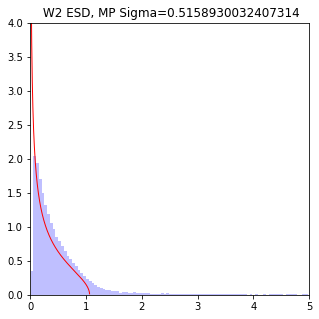

In [23]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, Q=Q, sigma=s1)
plt.xlim(0,5)
plt.ylim(0,4)

In [24]:
RMT_Util.calc_mp_soft_rank(evals=evals17,Q=Q, sigma=s1)

0.030190051669856464

### FC3

In [25]:
this_im = 22

for im, m in enumerate(alexnet.modules()):
    if im == this_im:
        W22 = np.array(m.weight.data.clone().cpu()) 
        Q = RMT_Util.get_Q(W22)
        
        u, sv, sh = svd(W22)
        
        evals22 = sv*sv
        break

% spikes outside bulk 11.11
% sigma 1.1007


RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


(0, 10)

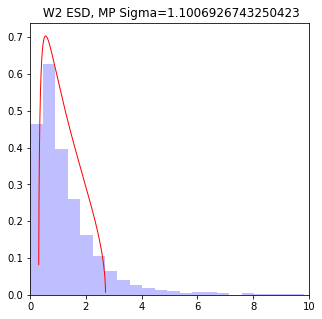

In [26]:
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals22, Q=Q, num_spikes=100)
plt.xlim(0,10)

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 0.00
% sigma 0.9866


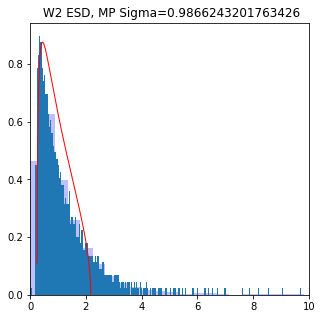

In [29]:
s1 = RMT_Util.fit_mp(evals22, Q)
RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals22, Q=Q, sigma=s1)
plt.xlim(0,10)
plt.hist(evals22,bins=1000, density=True);

In [30]:
RMT_Util.calc_mp_soft_rank(evals=evals17,Q=Q, sigma=s1)

0.061624154661628676